使用设备: cpu
训练进度: [0/60000]
训练进度: [6400/60000]
训练进度: [12800/60000]
训练进度: [19200/60000]
训练进度: [25600/60000]
训练进度: [32000/60000]
训练进度: [38400/60000]
训练进度: [44800/60000]
训练进度: [51200/60000]
训练进度: [57600/60000]

Epoch 1: 训练损失=0.1263, 测试损失=0.0551, 准确率=98.31%
训练进度: [0/60000]
训练进度: [6400/60000]
训练进度: [12800/60000]
训练进度: [19200/60000]
训练进度: [25600/60000]
训练进度: [32000/60000]
训练进度: [38400/60000]
训练进度: [44800/60000]
训练进度: [51200/60000]
训练进度: [57600/60000]

Epoch 2: 训练损失=0.0668, 测试损失=0.0930, 准确率=97.48%
训练进度: [0/60000]
训练进度: [6400/60000]
训练进度: [12800/60000]
训练进度: [19200/60000]
训练进度: [25600/60000]
训练进度: [32000/60000]
训练进度: [38400/60000]
训练进度: [44800/60000]
训练进度: [51200/60000]
训练进度: [57600/60000]

Epoch 3: 训练损失=0.0573, 测试损失=0.0575, 准确率=98.38%
训练进度: [0/60000]
训练进度: [6400/60000]
训练进度: [12800/60000]
训练进度: [19200/60000]
训练进度: [25600/60000]
训练进度: [32000/60000]
训练进度: [38400/60000]
训练进度: [44800/60000]
训练进度: [51200/60000]
训练进度: [57600/60000]

Epoch 4: 训练损失=0.0547, 测试损失=0.0637, 准确率=98.43%
训练进度: [0/60000]
训练进度: 

C:\Users\hydra-x1\AppData\Local\Temp\ipykernel_47812\2166101265.py:114: UserWarning: Glyph 25439 (\N{CJK UNIFIED IDEOGRAPH-635F}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\hydra-x1\AppData\Local\Temp\ipykernel_47812\2166101265.py:114: UserWarning: Glyph 22833 (\N{CJK UNIFIED IDEOGRAPH-5931}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\hydra-x1\AppData\Local\Temp\ipykernel_47812\2166101265.py:114: UserWarning: Glyph 35757 (\N{CJK UNIFIED IDEOGRAPH-8BAD}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\hydra-x1\AppData\Local\Temp\ipykernel_47812\2166101265.py:114: UserWarning: Glyph 32451 (\N{CJK UNIFIED IDEOGRAPH-7EC3}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\hydra-x1\AppData\Local\Temp\ipykernel_47812\2166101265.py:114: UserWarning: Glyph 20934 (\N{CJK UNIFIED IDEOGRAPH-51C6}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\hydra-x1\AppData\Local\Temp\ipykernel_47812\2166101265.py:114: Use

训练历史图已保存为 'training_history.png'


C:\Users\hydra-x1\AppData\Roaming\Python\Python312\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 25439 (\N{CJK UNIFIED IDEOGRAPH-635F}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\hydra-x1\AppData\Roaming\Python\Python312\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 22833 (\N{CJK UNIFIED IDEOGRAPH-5931}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\hydra-x1\AppData\Roaming\Python\Python312\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 35757 (\N{CJK UNIFIED IDEOGRAPH-8BAD}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\hydra-x1\AppData\Roaming\Python\Python312\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 32451 (\N{CJK UNIFIED IDEOGRAPH-7EC3}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\hydra-x1\AppData\Roaming\Python\Python312\site-packages\IPython\cor

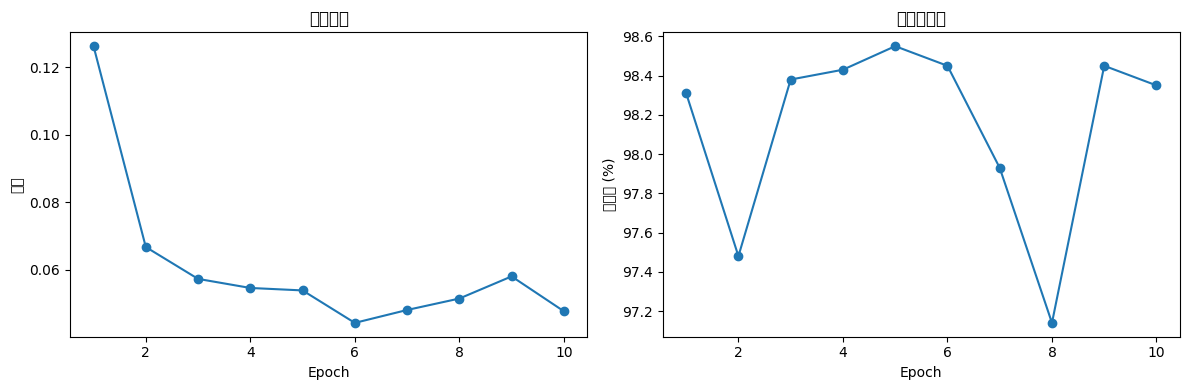

In [5]:
import torch
import torch.nn as nn
import torch.nn.functional as F  # 添加缺失的导入
import torch.optim as optim
from torch.utils.data import DataLoader
from torchvision import datasets, transforms
import matplotlib.pyplot as plt

class MNIST_CNN(nn.Module):
    def __init__(self):
        super().__init__()
        self.conv1 = nn.Conv2d(1, 16, 3, 1)  # 输出: 16x26x26
        self.conv2 = nn.Conv2d(16, 32, 3, 1)  # 输出: 32x24x24
        self.pool = nn.MaxPool2d(2)  # 输出: 32x12x12
        self.fc1 = nn.Linear(32 * 5 * 5, 64)  # 修正维度
        self.fc2 = nn.Linear(64, 10)

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))  # 输出: 32x5x5
        x = torch.flatten(x, 1)  # 展平为 32 * 12 * 12=4608
        x = F.relu(self.fc1(x))
        x = self.fc2(x)  # 输出10维，无需手动softmax
        return F.log_softmax(x, dim=1)


# 训练函数
def train_model():
    # 设置超参数
    batch_size = 64
    epochs = 10
    learning_rate = 0.01
    
    # 检查GPU是否可用
    device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
    print(f"使用设备: {device}")
    
    # 数据预处理
    transform = transforms.Compose([
        transforms.ToTensor(),
        transforms.Normalize((0.1307,), (0.3081,))
    ])
    
    # 加载数据集
    train_dataset = datasets.MNIST('./data', train=True, download=True, transform=transform)
    test_dataset = datasets.MNIST('./data', train=False, transform=transform)
    
    train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
    test_loader = DataLoader(test_dataset, batch_size=1000, shuffle=False)
    
    # 初始化模型
    model = MNIST_CNN().to(device)
    optimizer = optim.Adam(model.parameters(), lr=learning_rate)
    
    # 训练循环
    train_losses = []
    test_accuracies = []
    
    for epoch in range(1, epochs + 1):
        model.train()
        total_loss = 0
        
        for batch_idx, (data, target) in enumerate(train_loader):
            data, target = data.to(device), target.to(device)
            optimizer.zero_grad()
            output = model(data)
            loss = F.nll_loss(output, target)
            loss.backward()
            optimizer.step()
            total_loss += loss.item()
            
            if batch_idx % 100 == 0:
                print(f"训练进度: [{batch_idx * len(data)}/{len(train_loader.dataset)}]")
        
        # 计算平均损失
        avg_loss = total_loss / len(train_loader)
        train_losses.append(avg_loss)
        
        # 在测试集上评估
        model.eval()
        test_loss = 0
        correct = 0
        with torch.no_grad():
            for data, target in test_loader:
                data, target = data.to(device), target.to(device)
                output = model(data)
                test_loss += F.nll_loss(output, target, reduction='sum').item()
                pred = output.argmax(dim=1, keepdim=True)
                correct += pred.eq(target.view_as(pred)).sum().item()
        
        test_loss /= len(test_loader.dataset)
        accuracy = 100. * correct / len(test_loader.dataset)
        test_accuracies.append(accuracy)
        
        print(f"\nEpoch {epoch}: 训练损失={avg_loss:.4f}, 测试损失={test_loss:.4f}, 准确率={accuracy:.2f}%")
    
    # 保存模型
    torch.save(model.state_dict(), "mnist_cnn.pth")
    print("模型已保存为 'mnist_cnn.pth'")
    
    # 绘制训练曲线
    plt.figure(figsize=(12, 4))
    plt.subplot(1, 2, 1)
    plt.plot(range(1, epochs+1), train_losses, 'o-')
    plt.title('训练损失')
    plt.xlabel('Epoch')
    plt.ylabel('损失')
    
    plt.subplot(1, 2, 2)
    plt.plot(range(1, epochs+1), test_accuracies, 'o-')
    plt.title('测试准确率')
    plt.xlabel('Epoch')
    plt.ylabel('准确率 (%)')
    plt.tight_layout()
    plt.savefig('training_history.png')
    print("训练历史图已保存为 'training_history.png'")

if __name__ == "__main__":
    train_model()